### Looping Graph

In [3]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

class AgentState(TypedDict):
    name: str
    random_number: list[int]
    counter: int

In [17]:
import random

def greeting_node(state: AgentState) -> AgentState:
    print(f"Hello, {state['name']}! Let's start counting.")
    state["counter"] = 0
    return state 

def random_node(state: AgentState) -> AgentState:
    state["random_number"].append(random.randint(1, 100))
    print(f"Generated random number: {state['random_number'][0]}")
    state['counter'] += 1
    return state

def decide_counting(state: AgentState) -> AgentState:
    if state['counter'] < 5:
        print(f"Counter is {state['counter']}. Continuing to count...")
        return "loop"
    else:
        print(f"Counter reached {state['counter']}. Stopping.")
        return "end"
    

In [28]:
graph = StateGraph(AgentState)
graph.add_node("greeting", greeting_node)
graph.add_node("random", random_node)
graph.add_edge("greeting", "random")
graph.add_conditional_edges(
    "random",
    decide_counting,
    {
        "loop": "random",
        "end": END
    }
)

graph.add_edge(START, "greeting")
app = graph.compile()



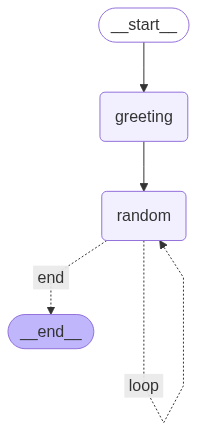

In [29]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))